## 1. Import Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
sns.set(rc={'figure.figsize':(15,8)})

## 2. Data Sourcing

In [4]:
data_file_path = os.path.join(os.path.split(os.getcwd())[0], 'data', 'data.csv')

In [5]:
raw_data = pd.read_csv(data_file_path)
raw_data.columns = ['query acc.verr', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
raw_data.head()

,query acc.verr,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,MN997409.1,MT020881.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
1,MN997409.1,MT020880.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MN985325.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN975262.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,LC522974.1,99.993,29878,2,0,4,29881,1,29878,0.0,55164


In [6]:
raw_data.shape

(262, 12)

## 3. Data Cleaning

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   query acc.verr    262 non-null    object 
 1   subject acc.ver   262 non-null    object 
 2   % identity        262 non-null    float64
 3   alignment length  262 non-null    int64  
 4   mismatches        262 non-null    int64  
 5   gap opens         262 non-null    int64  
 6   q. start          262 non-null    int64  
 7   q. end            262 non-null    int64  
 8   s. start          262 non-null    int64  
 9   s. end            262 non-null    int64  
 10  evalue            262 non-null    float64
 11  bit score         262 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 24.7+ KB


#### No null values are present. Therefore proceeding ahead with univariate / bivariate analysis

## 4. Univariate / Bivariate Analysis

In [8]:
raw_data.describe()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.0,262.000000
mean,86.011771,10637.942748,922.744275,58.041985,11338.793893,21940.320611,11255.438931,21858.328244,0.0,14084.083969
std,7.575081,10483.912818,1086.368120,60.664978,12024.681197,10661.273849,11966.473440,10628.475046,0.0,19095.454363
min,77.559000,1603.000000,0.000000,0.000000,1.000000,1923.000000,1.000000,1672.000000,0.0,1011.000000
25%,80.046000,1925.000000,142.000000,12.000000,16.000000,21577.000000,1.250000,21489.000000,0.0,2100.500000
50%,82.304000,5417.000000,359.000000,35.000000,3956.000000,27910.000000,3878.500000,27783.000000,0.0,3936.000000
75%,90.189000,17716.000000,989.000000,68.000000,22539.000000,29874.750000,22429.000000,29729.000000,0.0,15175.000000
max,100.000000,29882.000000,2952.000000,172.000000,28257.000000,29882.000000,28137.000000,30256.000000,0.0,55166.000000


### 4.1. query acc.verr

In [9]:
raw_data['query acc.verr'].unique()

array(['MN997409.1'], dtype=object)

#### We see that there is only 1 value in this column. Therefore we can drop this column before proceeding for further anlaysis.

In [10]:
raw_data = raw_data.drop(columns=['query acc.verr'])

In [11]:
raw_data.shape

(262, 11)

### 4.2. subject acc.ver

In [12]:
raw_data['subject acc.ver'].unique()

array(['MT020881.1', 'MT020880.1', 'MN985325.1', 'MN975262.1',
       'LC522974.1', 'MT049951.1', 'MT019532.1', 'MN996528.1',
       'NC_045512.2', 'MN908947.3', 'LC522975.1', 'LC522973.1',
       'MN988669.1', 'MN988668.1', 'MT019533.1', 'MT019531.1',
       'MT066175.1', 'MT027064.1', 'MN994468.1', 'MT044257.1',
       'MT027063.1', 'MT027062.1', 'MT019529.1', 'MN994467.1',
       'LR757995.1', 'MN988713.1', 'MT039888.1', 'MT039887.1',
       'LC522972.1', 'MT066176.1', 'MT019530.1', 'LR757996.1',
       'MT039890.1', 'MN996530.1', 'LR757998.1', 'MN996531.1',
       'MN938384.1', 'MN996529.1', 'MT007544.1', 'MT039873.1',
       'MN996527.1', 'MT044258.1', 'LC521925.1', 'MT020781.1',
       'MG772933.1', 'MG772934.1', 'AY394996.1', 'AY394997.1',
       'AY395003.1', 'AY304486.1', 'AY304488.1', 'AY390556.1',
       'AY394985.1', 'CS079029.1', 'EU371564.1', 'AY278554.2',
       'AY394986.1', 'AY394994.1', 'AY559093.1', 'EU371559.1',
       'KY417146.1', 'MK211376.1', 'AY394978.1', 'AY39

In [13]:
raw_data.groupby(['subject acc.ver'])['subject acc.ver'].count()

subject acc.ver
AP006561.1     4
AY278554.2     4
AY282752.2     4
AY283796.1     4
AY291451.1     4
              ..
MT044258.1     1
MT049951.1     1
MT066175.1     1
MT066176.1     1
NC_045512.2    1
Name: subject acc.ver, Length: 99, dtype: int64

#### We see that there are multiple values in this column. Therefore we should proceed with One-Hot encoding process.
#### But, during doing so, we see that there are number of items of which the count is just 1. There fore creating a speerate column for them is not advisable.
#### Also these values cannot be dropped because the data we are working on is very short.
#### Therefore, we would try dropping this column

In [14]:
raw_data = raw_data.drop(columns=['subject acc.ver'])

In [15]:
raw_data.shape

(262, 10)

### 4.3. Percent Identity

In [16]:
raw_data['% identity'].describe()

count    262.000000
mean      86.011771
std        7.575081
min       77.559000
25%       80.046000
50%       82.304000
75%       90.189000
max      100.000000
Name: % identity, dtype: float64

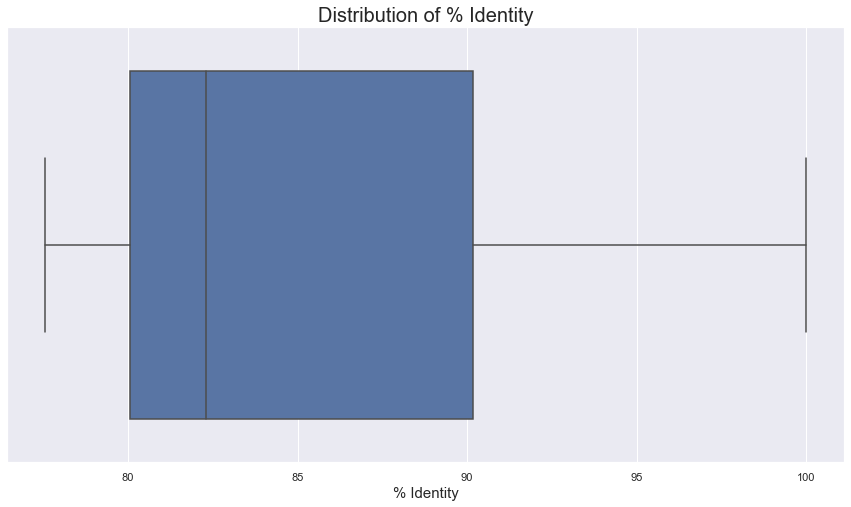

In [17]:
sns.boxplot(x=raw_data['% identity'])
plt.title('Distribution of % Identity', fontdict={'fontsize': 20})
plt.xlabel('% Identity', fontdict={'fontsize': 15})
plt.show()  

#### All the values seems to be in desirable range and not outliers are present.
#### So, we will keep it as it is

### 4.4. Alignment Length

In [18]:
raw_data['alignment length'].describe()

count      262.000000
mean     10637.942748
std      10483.912818
min       1603.000000
25%       1925.000000
50%       5417.000000
75%      17716.000000
max      29882.000000
Name: alignment length, dtype: float64

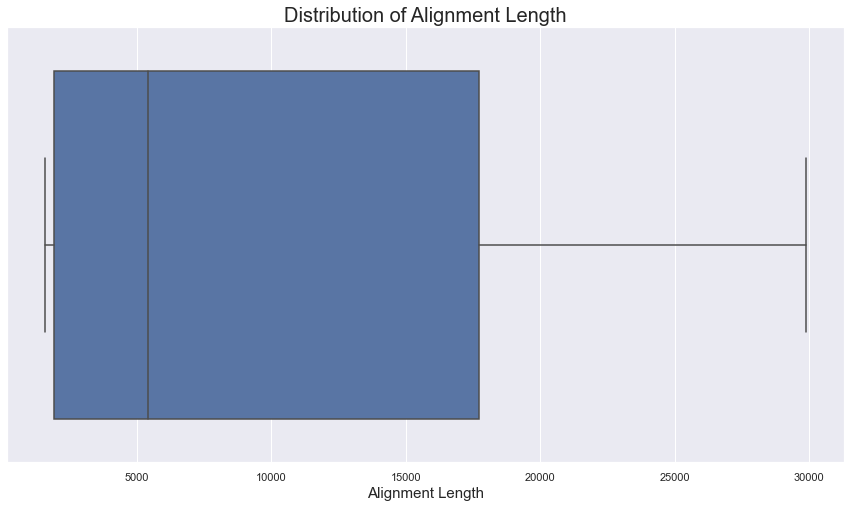

In [19]:
sns.boxplot(x=raw_data['alignment length'])
plt.title('Distribution of Alignment Length', fontdict={'fontsize': 20})
plt.xlabel('Alignment Length', fontdict={'fontsize': 15})
plt.show()  

#### All the values seems to be in desirable range and not outliers are present.
#### So, we will keep it as it is

### 4.5. Mismatches

In [20]:
raw_data['mismatches'].describe()

count     262.000000
mean      922.744275
std      1086.368120
min         0.000000
25%       142.000000
50%       359.000000
75%       989.000000
max      2952.000000
Name: mismatches, dtype: float64

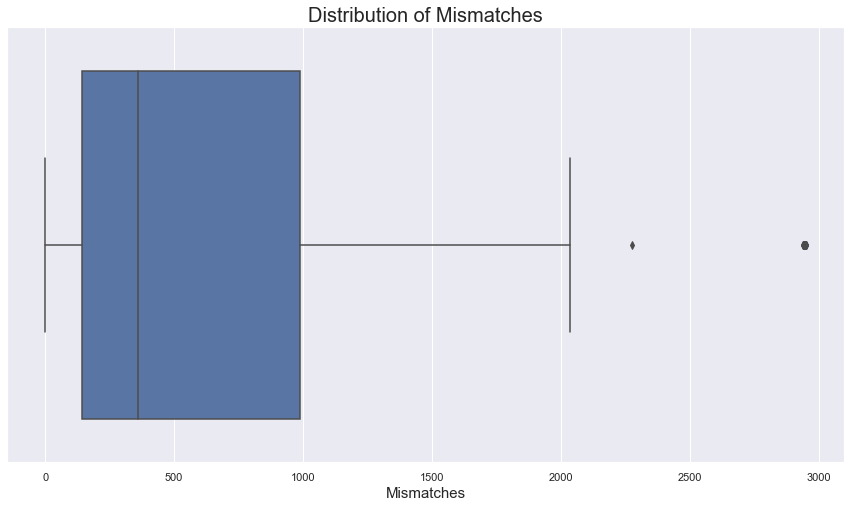

In [21]:
sns.boxplot(x=raw_data['mismatches'])
plt.title('Distribution of Mismatches', fontdict={'fontsize': 20})
plt.xlabel('Mismatches', fontdict={'fontsize': 15})
plt.show()  

#### Few values seems to have gone out of range. However, those cannot be dropped as it would reduce the data
#### So, we will keep it as it is

### 4.6. Gap Opens

In [22]:
raw_data['gap opens'].describe()

count    262.000000
mean      58.041985
std       60.664978
min        0.000000
25%       12.000000
50%       35.000000
75%       68.000000
max      172.000000
Name: gap opens, dtype: float64

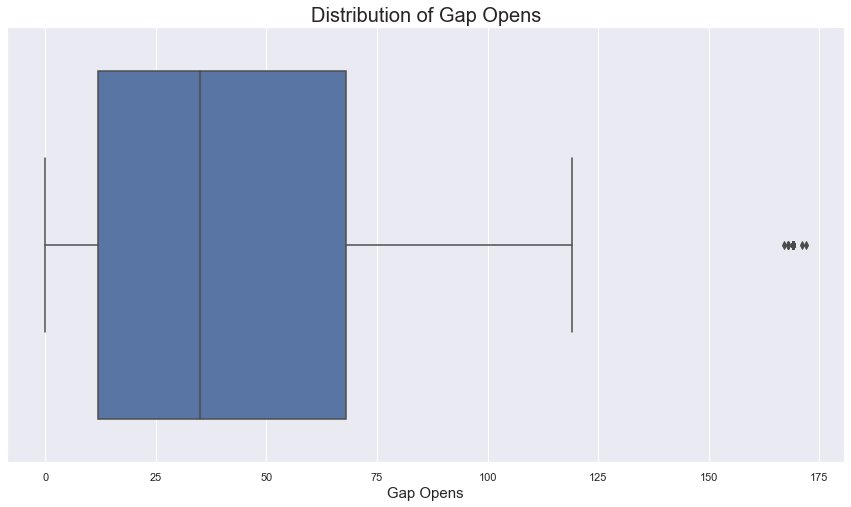

In [23]:
sns.boxplot(x=raw_data['gap opens'])
plt.title('Distribution of Gap Opens', fontdict={'fontsize': 20})
plt.xlabel('Gap Opens', fontdict={'fontsize': 15})
plt.show()  

#### Few values seems to have gone out of range. However, those cannot be dropped as it would reduce the data
#### So, we will keep it as it is

### 4.7. Q-Start

In [24]:
raw_data['q. start'].describe()

count      262.000000
mean     11338.793893
std      12024.681197
min          1.000000
25%         16.000000
50%       3956.000000
75%      22539.000000
max      28257.000000
Name: q. start, dtype: float64

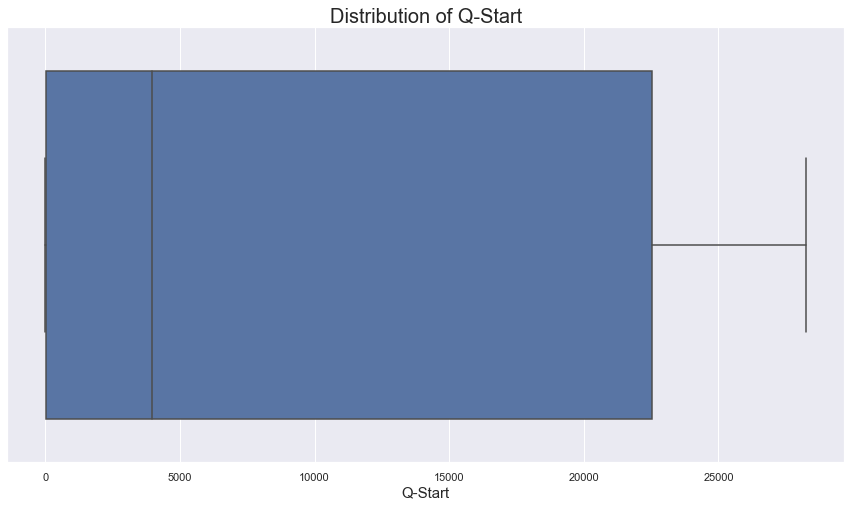

In [25]:
sns.boxplot(x=raw_data['q. start'])
plt.title('Distribution of Q-Start', fontdict={'fontsize': 20})
plt.xlabel('Q-Start', fontdict={'fontsize': 15})
plt.show()  

#### All the values seems to be in desirable range and not outliers are present.
#### So, we will keep it as it is

### 4.8. Q-End

In [26]:
raw_data['q. end'].describe()

count      262.000000
mean     21940.320611
std      10661.273849
min       1923.000000
25%      21577.000000
50%      27910.000000
75%      29874.750000
max      29882.000000
Name: q. end, dtype: float64

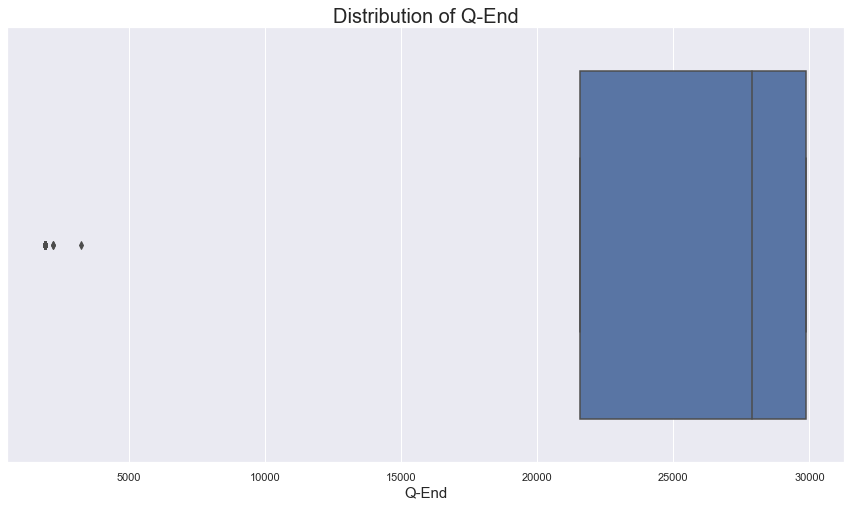

In [27]:
sns.boxplot(x=raw_data['q. end'])
plt.title('Distribution of Q-End', fontdict={'fontsize': 20})
plt.xlabel('Q-End', fontdict={'fontsize': 15})
plt.show()  

#### Few values seems to have gone out of range. However, those cannot be dropped as it would reduce the data
#### So, we will keep it as it is

### 4.9. S-Start

In [28]:
raw_data['s. start'].describe()

count      262.000000
mean     11255.438931
std      11966.473440
min          1.000000
25%          1.250000
50%       3878.500000
75%      22429.000000
max      28137.000000
Name: s. start, dtype: float64

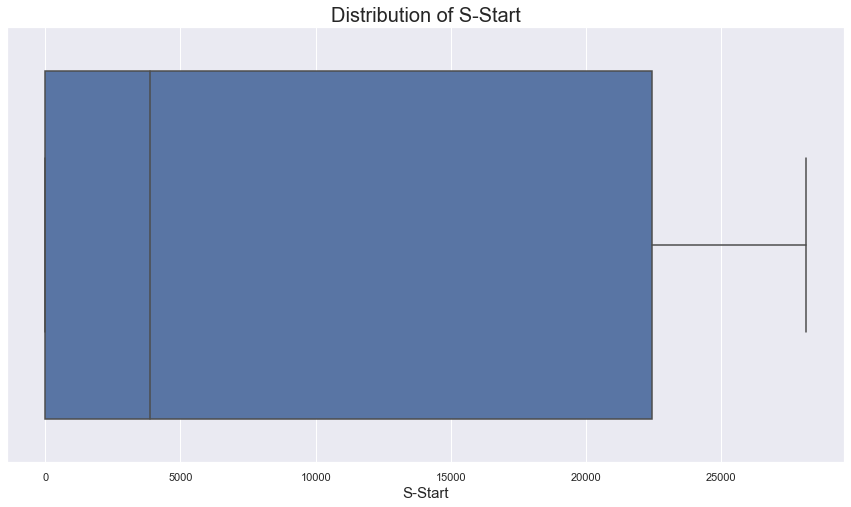

In [29]:
sns.boxplot(x=raw_data['s. start'])
plt.title('Distribution of S-Start', fontdict={'fontsize': 20})
plt.xlabel('S-Start', fontdict={'fontsize': 15})
plt.show()  

#### All the values seems to be in desirable range and not outliers are present.
#### So, we will keep it as it is

### 4.10. S-End

In [30]:
raw_data['s. end'].describe()

count      262.000000
mean     21858.328244
std      10628.475046
min       1672.000000
25%      21489.000000
50%      27783.000000
75%      29729.000000
max      30256.000000
Name: s. end, dtype: float64

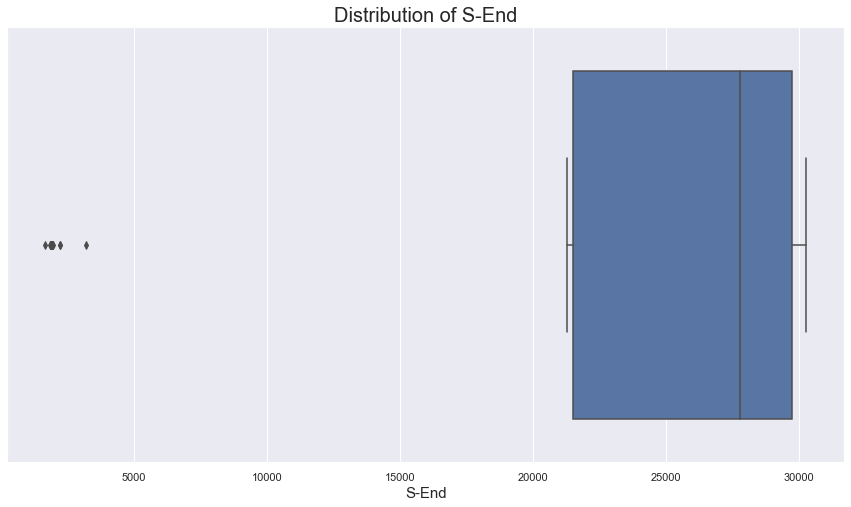

In [31]:
sns.boxplot(x=raw_data['s. end'])
plt.title('Distribution of S-End', fontdict={'fontsize': 20})
plt.xlabel('S-End', fontdict={'fontsize': 15})
plt.show()  

#### Few values seems to have gone out of range. However, those cannot be dropped as it would reduce the data
#### So, we will keep it as it is

### 4.11. Evalue

In [32]:
raw_data['evalue'].describe()

count    262.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: evalue, dtype: float64

#### E-Value has same value throughout the column, by which it wont output variable.
#### Therefore, we will drop the same

In [33]:
raw_data = raw_data.drop(columns=['evalue'])

In [34]:
raw_data.shape

(262, 9)

### 4.12. Bit Score

In [35]:
raw_data['bit score'].describe()

count      262.000000
mean     14084.083969
std      19095.454363
min       1011.000000
25%       2100.500000
50%       3936.000000
75%      15175.000000
max      55166.000000
Name: bit score, dtype: float64

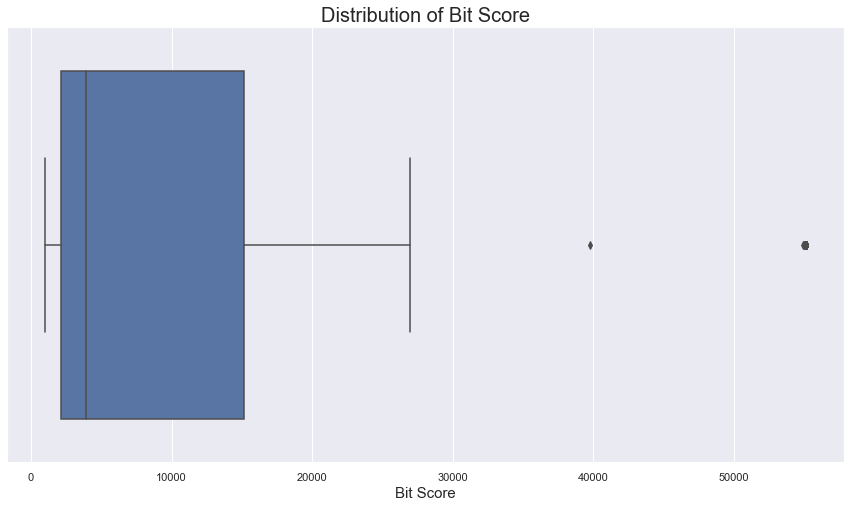

In [36]:
sns.boxplot(x=raw_data['bit score'])
plt.title('Distribution of Bit Score', fontdict={'fontsize': 20})
plt.xlabel('Bit Score', fontdict={'fontsize': 15})
plt.show()  

#### Few values seems to have gone out of range. However, those cannot be dropped as it would reduce the data
#### So, we will keep it as it is

In [37]:
pd.DataFrame(raw_data.corr())

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,bit score
% identity,1.000000,0.626757,-0.451092,-0.532851,-0.046304,0.565824,-0.045665,0.568650,0.790443
alignment length,0.626757,1.000000,0.214242,0.144522,-0.558664,0.353009,-0.558718,0.356930,0.943982
mismatches,-0.451092,0.214242,1.000000,0.988165,-0.200969,-0.019007,-0.202615,-0.019909,-0.120070
gap opens,-0.532851,0.144522,0.988165,1.000000,-0.187285,-0.072184,-0.188851,-0.073240,-0.187407
q. start,-0.046304,-0.558664,-0.200969,-0.187285,1.000000,0.578779,0.999987,0.575335,-0.500228
q. end,0.565824,0.353009,-0.019007,-0.072184,0.578779,1.000000,0.578717,0.999975,0.364850
s. start,-0.045665,-0.558718,-0.202615,-0.188851,0.999987,0.578717,1.000000,0.575301,-0.499729
s. end,0.568650,0.356930,-0.019909,-0.073240,0.575335,0.999975,0.575301,1.000000,0.369137
bit score,0.790443,0.943982,-0.120070,-0.187407,-0.500228,0.364850,-0.499729,0.369137,1.000000


### 4.13. Plotting Correlation Map

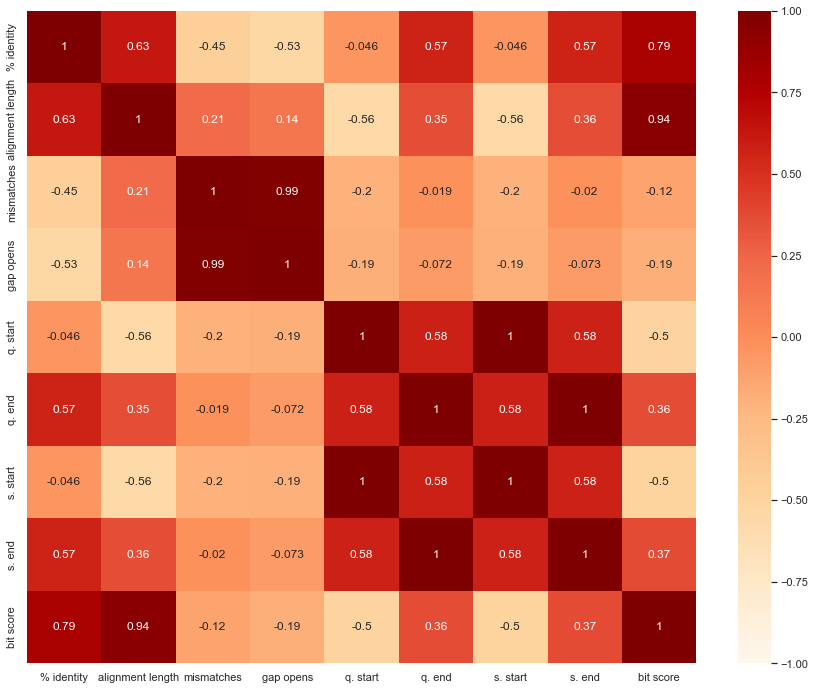

In [38]:
plt.figure(figsize = (15,12))
p = sns.heatmap(pd.DataFrame(raw_data.corr()), annot=True, vmin=-1, vmax=1, cmap='OrRd')
plt.show()